# COLLEGE STUDENT ADMISSION ANALYSIS

Attribute Description

GRE : Graduate Record Exam Scores

GPA : Grade Point Average

Rank : It refers to the prestige of the undergraduate institution. The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

Admit : It is a response variable; admit/don’t admit is a binary variable where 1 indicates that student is admitted and 0
indicates that student is not admitted.

SES : SES refers to socioeconomic status: 1 - low, 2 - medium, 3 - high.

Gender_male : Gender_male (0, 1) = 0 -> Female, 1 -> Male

Race : Race – 1, 2, and 3 represent Hispanic, Asian, and African-American

IMPORTING LIBRARIES

In [2]:
# pandas is used for data analysis and data manipulation
import pandas as pd

#matplotlib is used for making plots
import matplotlib.pyplot as plt
%matplotlib inline

#seaborn is another library for plots
import seaborn as sns

#Sklearn is used for implementing machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Statsmodels is used for the estimation of many different statistical models
import statsmodels.api as sm
import statsmodels.formula.api as smapi

In [4]:
adm.dtypes


admit            int64
gre              int64
gpa            float64
ses              int64
Gender_Male      int64
Race             int64
rank             int64
dtype: object

In [3]:
#here data set include in the file
adm=pd.read_csv('Project 5_College_admission.csv')
#First check the shape of data
print("shape : ",adm.shape)

shape :  (400, 7)


In [5]:
#Head used to see starting obsevations of dataset
adm.head(10)

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4
5,1,760,3.00,2,1,1,2
6,1,560,2.98,2,1,2,1
7,0,400,3.08,2,0,2,2
8,1,540,3.39,1,1,1,3
9,0,700,3.92,1,0,2,2


In [6]:
#Tail is used to see last obsevations of the data 
adm.tail(10)

,admit,gre,gpa,ses,Gender_Male,Race,rank
390,1,800,3.05,1,1,3,2
391,1,660,3.88,1,0,1,2
392,1,600,3.38,3,0,3,3
393,1,620,3.75,2,0,2,2
394,1,460,3.99,3,1,3,3
395,0,620,4.00,2,0,2,2
396,0,560,3.04,2,0,1,3
397,0,460,2.63,3,0,2,2
398,0,700,3.65,1,1,1,2
399,0,600,3.89,2,1,3,3


## Data describtion

In [7]:
#It shows info about the dataset
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    int64  
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [8]:
#It is used for calculating statistical value of the DataFrame
adm.describe()

,admit,gre,gpa,ses,Gender_Male,Race,rank
count,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,1.992500,0.475,1.962500,2.48500
std,0.466087,115.516536,0.380567,0.808751,0.500,0.823279,0.94446
min,0.000000,220.000000,2.260000,1.000000,0.000,1.000000,1.00000
25%,0.000000,520.000000,3.130000,1.000000,0.000,1.000000,2.00000
50%,0.000000,580.000000,3.395000,2.000000,0.000,2.000000,2.00000
75%,1.000000,660.000000,3.670000,3.000000,1.000,3.000000,3.00000
max,1.000000,800.000000,4.000000,3.000000,1.000,3.000000,4.00000


In [117]:
#this gives the relations between attributes of data
adm.corr()

,admit,gre,gpa,ses,Gender_Male,Race,rank
admit,1.000000,0.184434,0.178212,-0.046858,-0.025004,-0.060335,-0.242513
gre,0.184434,1.000000,0.384266,-0.033182,0.006813,-0.047028,-0.123447
gpa,0.178212,0.384266,1.000000,0.006838,-0.017136,0.058303,-0.057461
ses,-0.046858,-0.033182,0.006838,1.000000,-0.028355,-0.053121,0.008055
Gender_Male,-0.025004,0.006813,-0.017136,-0.028355,1.000000,-0.054035,-0.027333
Race,-0.060335,-0.047028,0.058303,-0.053121,-0.054035,1.000000,0.036342
rank,-0.242513,-0.123447,-0.057461,0.008055,-0.027333,0.036342,1.000000


In [118]:
#from this we can see maximum correlation is admit with gre, gpa with gre

## Check null values

In [119]:
# for checking and getting better results in the true/false form if is their any null values or not we do :

adm.isnull()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False


In [120]:
# for counting of whole data have null values (any) or not then we do :

adm.isnull().sum()  

admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64

In [121]:
# Checking missing values manually
null_col = pd.DataFrame({'Columns':adm.isna().sum().index,'No. Null Values':adm.isna().sum().values,'Percentage':adm.isna().sum().values/adm.shape[0]})
null_col

,Columns,No. Null Values,Percentage
0,admit,0,0.0
1,gre,0,0.0
2,gpa,0,0.0
3,ses,0,0.0
4,Gender_Male,0,0.0
5,Race,0,0.0
6,rank,0,0.0


### Checking value count of attributes

In [122]:
adm['admit'].value_counts()

0    273
1    127
Name: admit, dtype: int64

In [123]:
adm['rank'].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [124]:
adm['ses'].value_counts()

2    139
1    132
3    129
Name: ses, dtype: int64

In [125]:
adm['Gender_Male'].value_counts()

0    210
1    190
Name: Gender_Male, dtype: int64

In [126]:
adm['Race'].value_counts()

1    143
2    129
3    128
Name: Race, dtype: int64

In [127]:
# Not admitted students

print('Percentage of not admitted: ',273/4)
print('No of student not admitted: ',273)

Percentage of not admitted:  68.25
No of student not admitted:  273


In [128]:
# admitted students
print('Percentage of admitted: ',127/4)
print('No of student admitted: ',127)

Percentage of admitted:  31.75
No of student admitted:  127


## PLOTS

<AxesSubplot:title={'center':'Admitted and Not admitted'}, xlabel='admit', ylabel='count'>

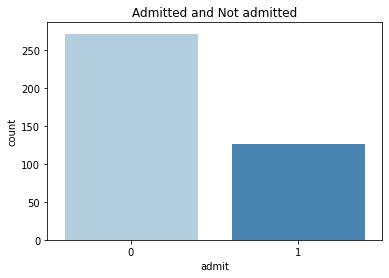

In [9]:
plt.title('Admitted and Not admitted')
sns.countplot(x = 'admit', data= adm, palette='Blues', edgecolor='w')

<AxesSubplot:xlabel='gpa', ylabel='admit'>

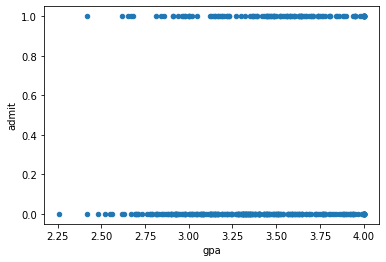

In [130]:
#import matplotlib libraries to plot graphs,figures,lines etc
#scatter plot represents the dataset by a dot
import matplotlib.pyplot as plt
adm.plot.scatter('gpa','admit')

<AxesSubplot:xlabel='gre', ylabel='admit'>

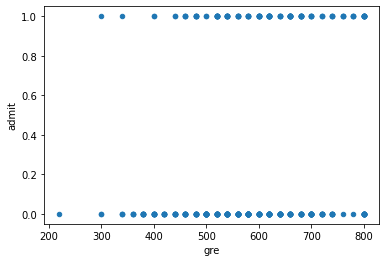

In [131]:
adm.plot.scatter('gre','admit')

In [5]:
#shows the relationship between gre and admit
adm['gre'].corr(adm['admit'])

0.18443427707809318

Text(0.5, 1.0, 'GRE vs GPA')

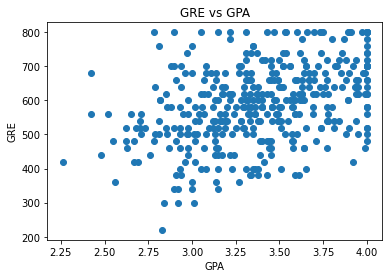

In [6]:
#This plot shows gpa with gre values
plt.plot(adm['gpa'],adm['gre'],'o')
plt.xlabel('GPA')
plt.ylabel('GRE')
plt.title('GRE vs GPA')

C:\Users\H.P\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Admission'}, xlabel='gpa', ylabel='Density'>

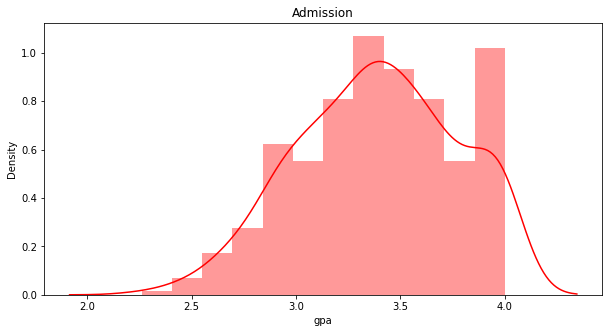

In [7]:
# It shows gpa graph
plt.figure(figsize=(10,5), )
plt.title('Admission')

sns.distplot(adm['gpa'], color='red')

# Linear Regression

In [142]:
#simple linear regression model
import statsmodels.formula.api as smapi
model1=smapi.ols(formula='gre~gpa',data=adm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     68.95
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.60e-15
Time:                        17:15:28   Log-Likelihood:                -2434.9
No. Observations:                 400   AIC:                             4874.
Df Residuals:                     398   BIC:                             4882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.3042     47.916      4.013      0.000      98.105     286.504
gpa          116.6394     14.047      8.304      0.000      89.024     144.255
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.124
Skew:                          -0.048   Prob(JB):                        0.570
Kurtosis:                       2.758   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
#here predicting the values through linear regression
pr=model1.predict()
adm['prediction1']=pr
adm.head(10)

,admit,gre,gpa,ses,Gender_Male,Race,rank,prediction1
0,0,380,3.61,1,0,3,3,613.372322
1,1,660,3.67,2,0,2,3,620.370684
2,1,800,4.00,2,0,2,1,658.861671
3,1,640,3.19,1,1,2,4,564.383793
4,0,520,2.93,3,1,2,4,534.057560
5,1,760,3.00,2,1,1,2,542.222315
6,1,560,2.98,2,1,2,1,539.889528
7,0,400,3.08,2,0,2,2,551.553463
8,1,540,3.39,1,1,1,3,587.711664
9,0,700,3.92,1,0,2,2,649.530523


In [144]:
#y=B0 + B1X1
y= 192.304 +  116.6394*3.61
y

613.3722339999999

Text(0.5, 1.0, 'gre vs gpa')

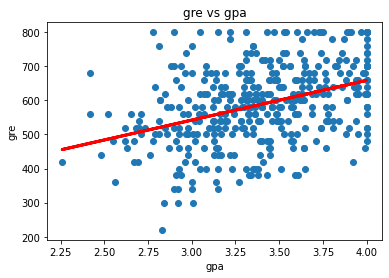

In [145]:
plt.plot(adm['gpa'],adm['gre'],'o')
plt.plot(adm['gpa'],pr,'r',linewidth=3)
plt.xlabel('gpa')
plt.ylabel('gre')
plt.title('gre vs gpa')

In [146]:
#SO this state they don't have any relation

# Using admit as dependent variable

# Multiple Linear Regression

In [153]:
#y is independent varaible
#x is dependent varaible
#uncentered means does not contain intercept term
#r-squared=goodness of model
#residuals are also known as errors
X=adm[['rank','gre','gpa']]
Y=adm['admit']
model2=sm.OLS(Y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  admit   R-squared (uncentered):                   0.382
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              81.77
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    3.28e-41
Time:                        17:16:44   Log-Likelihood:                         -241.89
No. Observations:                 400   AIC:                                      489.8
Df Residuals:                     397   BIC:                                      501.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rank          -0.1164      0.022     -5.222      0.000      -0.160      -0.073
gre            0.0004      0.000      1.969      0.050    6.59e-07       0.001
gpa            0.1097      0.040      2.747      0.006       0.031       0.188
==============================================================================
Omnibus:                      204.151   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.878
Skew:                           0.678   Prob(JB):                     3.29e-12
Kurtosis:                       1.845   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
pred=model2.predict()
adm['prediction2']=pred
adm.head(10)

,admit,gre,gpa,ses,Gender_Male,Race,rank,prediction1,prediction2
0,0,380,3.61,1,0,3,3,613.372322,0.199853
1,1,660,3.67,2,0,2,3,620.370684,0.319335
2,1,800,4.00,2,0,2,1,658.861671,0.644782
3,1,640,3.19,1,1,2,4,564.383793,0.142232
4,0,520,2.93,3,1,2,4,534.057560,0.065335
5,1,760,3.00,2,1,1,2,542.222315,0.402595
6,1,560,2.98,2,1,2,1,539.889528,0.436163
7,0,400,3.08,2,0,2,2,551.553463,0.266207
8,1,540,3.39,1,1,1,3,587.711664,0.240245
9,0,700,3.92,1,0,2,2,649.530523,0.479282


In [155]:
#Y=B1*X1 + B2*X2 + B3*X3 
Y=3*-0.1164+380*0.0004+3.61*0.1097
Y

0.198817

# Logistic regression

In [138]:
X=adm[['rank','gre','ses']]
y=adm['admit']
model2=sm.OLS(y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  admit   R-squared (uncentered):                   0.370
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              77.79
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                    1.35e-39
Time:                        17:15:17   Log-Likelihood:                         -245.65
No. Observations:                 400   AIC:                                      497.3
Df Residuals:                     397   BIC:                                      509.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rank          -0.0890      0.021     -4.262      0.000      -0.130      -0.048
gre            0.0009      0.000      8.386      0.000       0.001       0.001
ses           -0.0035      0.026     -0.137      0.891      -0.054       0.047
==============================================================================
Omnibus:                      200.950   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.833
Skew:                           0.668   Prob(JB):                     5.55e-12
Kurtosis:                       1.848   Cond. No.                         714.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#here we divide data into train and test through sklearn module
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [140]:
#here we create confusion matrix
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[61,  4],
       [26,  9]], dtype=int64)

In [141]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy score of the Logistic Regression model:",accuracy*100,"%")

Accuracy score of the Logistic Regression model: 70.0 %


### Thus, we conclude that logistic regression is best algorithm for this it gives 70% accuracy.

Submited by--

Shruti Sharma